In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os

from pathlib import Path

import motorlab as ml
import numpy as np
import yaml

In [3]:
os.chdir(Path().resolve().parent)

### eval

In [ ]:
# old gbyk
runs = ml.wandb.download_sweep_data("rsv6azef")
runs_uid = {
    run["config.poses.representation"]: run["config.uid"] for run in runs
}
runs_uid

{'loose': '20250807163704',
 'medium': '20250807163553',
 'strict': '20250807163441',
 'draconian': '20250807163328',
 'allocentric': '20250807150405',
 'centered': '20250807150231',
 'egocentric': '20250807150107',
 'trunk': '20250807145939',
 'head': '20250807145810',
 'pc': '20250807145637'}

In [ ]:
# old gbyk
runs_uid = {
    "loose": "20250807163704",
    "medium": "20250807163553",
    "strict": "20250807163441",
    "draconian": "20250807163328",
    "allocentric": "20250807150405",
    "centered": "20250807150231",
    "egocentric": "20250807150107",
    "trunk": "20250807145939",
    "head": "20250807145810",
    "pc": "20250807145637",
}

In [164]:
# new GBYK
runs = {
    "allocentric": "20250806055952",
    "centered": "20250806063311",
    "egocentric": "20250806070444",
    "trunk": "20250806073611",
    "head": "20250806080630",
    "pc": "20250807113857",
    "loose": "20250806091022",
    "medium": "20250806094213",
    "strict": "20250806101400",
    "draconian": "20250806104542",
}

In [ ]:
config_path = Path(
    f"artifacts/config/poses_to_position/{runs_uid['draconian']}.yml"
)

with open(config_path, "r") as f:
    config = yaml.safe_load(f)

# config["include_trial"] = True
# config["include_homing"] = False

# config["include_trial"] = False
# config["include_homing"] = True

eval_metrics, eval_gts, eval_preds = ml.model.evaluate(config)

eval_gts = {
    session: gt["position"].reshape(-1, 2) for session, gt in eval_gts.items()
}
tiled_gts = {
    session: ml.room.get_tiles(gt[:, 0], gt[:, 1])
    for session, gt in eval_gts.items()
}

eval_preds = {
    session: pred["position"].reshape(-1, 2)
    for session, pred in eval_preds.items()
}
tiled_preds = {
    session: ml.room.get_tiles(pred[:, 0], pred[:, 1])
    for session, pred in eval_preds.items()
}

/Users/caio/dev/motorlab/motorlab/data.py:88: RuntimeWarning: Mean of empty slice
  mm_data = np.nanmean(mm_data, axis=1)
/Users/caio/dev/motorlab/motorlab/data.py:88: RuntimeWarning: Mean of empty slice
  mm_data = np.nanmean(mm_data, axis=1)
/Users/caio/dev/motorlab/motorlab/data.py:88: RuntimeWarning: Mean of empty slice
  mm_data = np.nanmean(mm_data, axis=1)
/Users/caio/dev/motorlab/motorlab/data.py:88: RuntimeWarning: Mean of empty slice
  mm_data = np.nanmean(mm_data, axis=1)


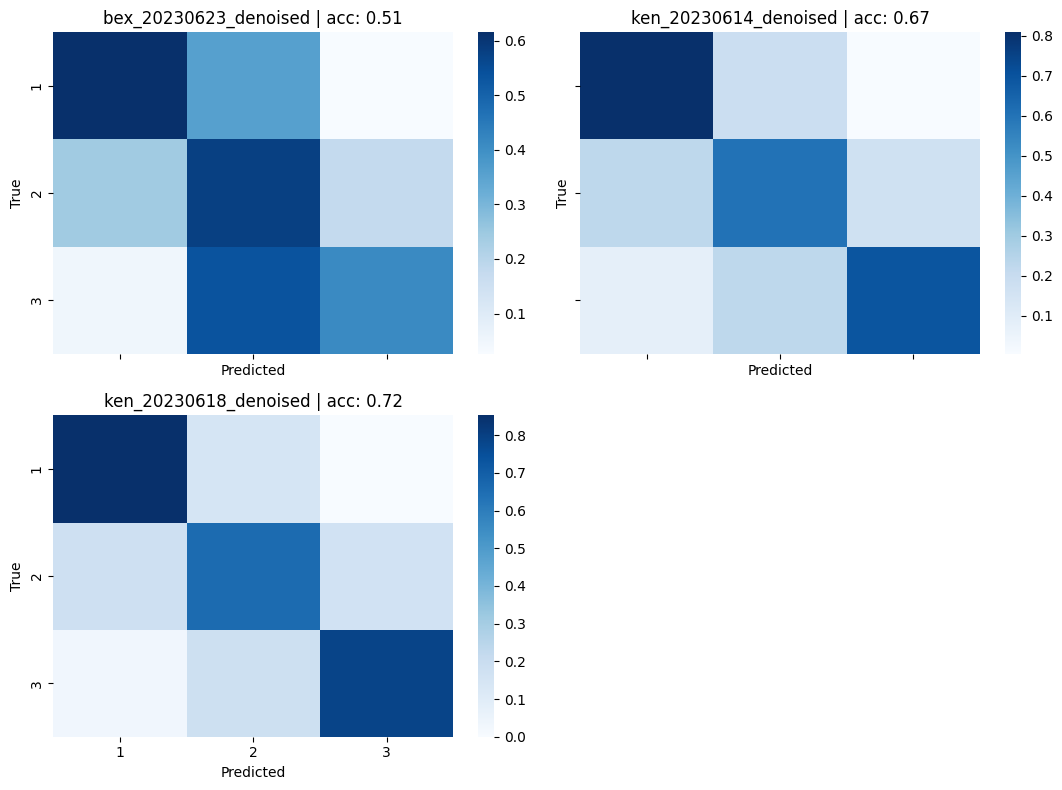

In [20]:
ml.plot.confusion_matrix(
    tiled_gts,
    tiled_preds,
    group="y",
    include_sitting=False,
    # concat=True,
)

In [ ]:
bex_gts = {
    session: gts for session, gts in eval_gts.items() if "bex" in session
}

bex_preds = {
    session: preds for session, preds in eval_preds.items() if "bex" in session
}

ml.plot.room_histogram2d(bex_gts, bex_preds, concat=True)

In [ ]:
bex_tiled_gts = {
    session: gt for session, gt in tiled_gts.items() if "bex" in session
}

bex_tiled_preds = {
    session: pred for session, pred in tiled_preds.items() if "bex" in session
}

ml.plot.confusion_matrix(
    bex_tiled_gts,
    bex_tiled_preds,
    group="y",
    include_sitting=False,
    concat=True,
)

In [ ]:
ken_gts = {
    session: gts for session, gts in eval_gts.items() if "ken" in session
}

ken_preds = {
    session: preds for session, preds in eval_preds.items() if "ken" in session
}

ml.plot.room_histogram2d(ken_gts, ken_preds, concat=True)

In [ ]:
ken_tiled_gts = {
    session: gt for session, gt in tiled_gts.items() if "ken" in session
}

ken_tiled_preds = {
    session: pred for session, pred in tiled_preds.items() if "ken" in session
}

ml.plot.confusion_matrix(
    ken_tiled_gts,
    ken_tiled_preds,
    group="y",
    include_sitting=False,
    concat=True,
)

In [ ]:
bex_ken_gts = {
    "bex": np.concatenate(list(bex_gts.values()), axis=0),
    "ken": np.concatenate(list(ken_gts.values()), axis=0),
}

bex_ken_preds = {
    "bex": np.concatenate(list(bex_preds.values()), axis=0),
    "ken": np.concatenate(list(ken_preds.values()), axis=0),
}

ml.plot.room_histogram2d(
    bex_ken_gts,
    bex_ken_preds,
    # save_path="plots/pose_to_position/histogram_trial_fc.svg",
)

In [ ]:
bex_ken_tiled_gts = {
    "bex": np.concatenate(list(bex_tiled_gts.values()), axis=0),
    "ken": np.concatenate(list(ken_tiled_gts.values()), axis=0),
}

bex_ken_tiled_preds = {
    "bex": np.concatenate(list(bex_tiled_preds.values()), axis=0),
    "ken": np.concatenate(list(ken_tiled_preds.values()), axis=0),
}

ml.plot.confusion_matrix(
    bex_ken_tiled_gts,
    bex_ken_tiled_preds,
    group="y",
    # include_sitting=True,
)

In [ ]:
tile_size = 0.865

gts = {
    "ideal": np.array(
        [
            [1 * tile_size, 0 * tile_size + tile_size / 2],
            [2 * tile_size, 0 * tile_size + tile_size / 2],
            [3 * tile_size, 0 * tile_size + tile_size / 2],
            [1 * tile_size, 1 * tile_size + tile_size / 2],
            [2 * tile_size, 1 * tile_size + tile_size / 2],
            [3 * tile_size, 1 * tile_size + tile_size / 2],
            [1 * tile_size, 2 * tile_size + tile_size / 2],
            [2 * tile_size, 2 * tile_size + tile_size / 2],
            [3 * tile_size, 2 * tile_size + tile_size / 2],
            [1 * tile_size, 3 * tile_size + tile_size / 2],
            [2 * tile_size, 3 * tile_size + tile_size / 2],
            [3 * tile_size, 3 * tile_size + tile_size / 2],
            [1 * tile_size, 4 * tile_size + tile_size / 2],
            [2 * tile_size, 4 * tile_size + tile_size / 2],
            [3 * tile_size, 4 * tile_size + tile_size / 2],
        ]
    )
}
preds = {
    "ideal": np.array(
        [
            [3 * tile_size, 0 * tile_size + tile_size / 2],
            [2 * tile_size, 0 * tile_size + tile_size / 2],
            [1 * tile_size, 0 * tile_size + tile_size / 2],
            [3 * tile_size, 3 * tile_size + tile_size / 2],
            [2 * tile_size, 3 * tile_size + tile_size / 2],
            [1 * tile_size, 3 * tile_size + tile_size / 2],
            [3 * tile_size, 2 * tile_size + tile_size / 2],
            [2 * tile_size, 2 * tile_size + tile_size / 2],
            [1 * tile_size, 2 * tile_size + tile_size / 2],
            [3 * tile_size, 1 * tile_size + tile_size / 2],
            [2 * tile_size, 1 * tile_size + tile_size / 2],
            [1 * tile_size, 1 * tile_size + tile_size / 2],
            [3 * tile_size, 4 * tile_size + tile_size / 2],
            [2 * tile_size, 4 * tile_size + tile_size / 2],
            [1 * tile_size, 4 * tile_size + tile_size / 2],
        ]
    )
}
ml.plot.room_histogram2d(
    gts,
    preds,
    save_path="plots/pose_to_position/histogram_homing_ideal.svg",
)

In [ ]:
ml.plot.confusion_matrix(
    eval_gts,
    eval_preds,
    # group="x",
    include_sitting=True,
    # save_path="plots/pose_to_position/confusion_matrix_nofilter_homing.svg",
)

In [ ]:
ml.room.plot(save_path="plots/pose_to_position/room.svg")